In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Finding the fourier coefficients of a function

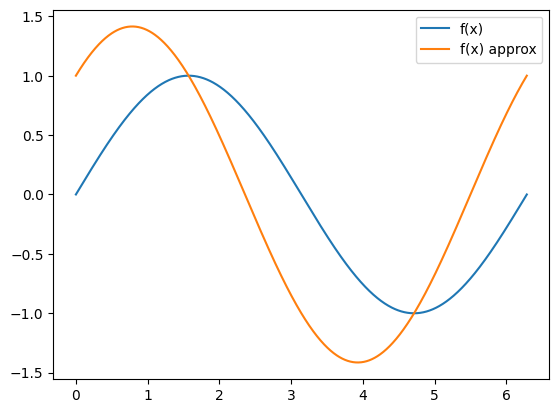

In [11]:
class Fourier:
    def __init__(self, f, K):
        self.domain = np.linspace(0, 2 * np.pi, 1000)
        self.basis = [lambda x: 1] + [lambda x, k=k: np.sin(k * x) for k in range(1, K+1)] + [lambda x, k=k: np.cos(k * x) for k in range(1, K+1)]

        # we want to vectorize the basis functions

        for i in range(len(self.basis)):
            self.basis[i] = np.vectorize(self.basis[i])

        self.f = f
        self.K = K
        self.coeffs = np.zeros(2 * K + 1)
        self.fit()

    def integral(self,f,u):
        # fu is the integral of f*u over the domain
        fu = np.trapz(f(self.domain) * u(self.domain), self.domain)
        uu = np.trapz(u(self.domain) * u(self.domain), self.domain)
        return fu/uu
        
    def fit(self):
        # a_k = <f,cos kt> / <cos kt, cos kt>
        # b_k = <f,sin kt> / <sin kt, sin kt>
        for k in range(2 * self.K + 1):
            if k < self.K:
                self.coeffs[k] = self.integral(self.f, self.basis[k])
            else:
                self.coeffs[k] = self.integral(self.f, self.basis[k - self.K])

    def predict(self, x):
        return sum([self.coeffs[k] * self.basis[k](x) for k in range(2 * self.K + 1)])
    
    def plot(self):
        plt.plot(self.domain, self.f(self.domain), label='f(x)')
        plt.plot(self.domain, self.predict(self.domain), label='f(x) approx')
        plt.legend()
        plt.show()

f = lambda x: np.sin(x)

fourier = Fourier(f, 15)
fourier.plot()